<a href="https://colab.research.google.com/github/Monisha09-ds/-/blob/main/Water__Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv("/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
df.shape


(3276, 10)

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
df.Potability.value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


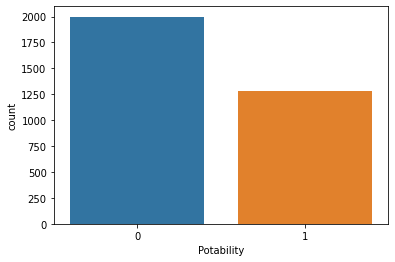

In [16]:
sns.countplot(df.Potability)
plt.show()

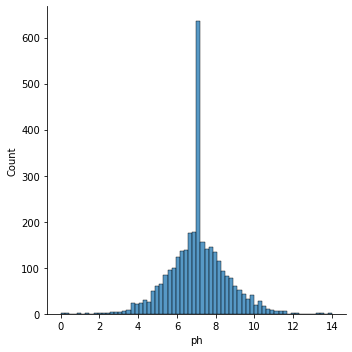

In [17]:
sns.displot(df.ph)
plt.show()

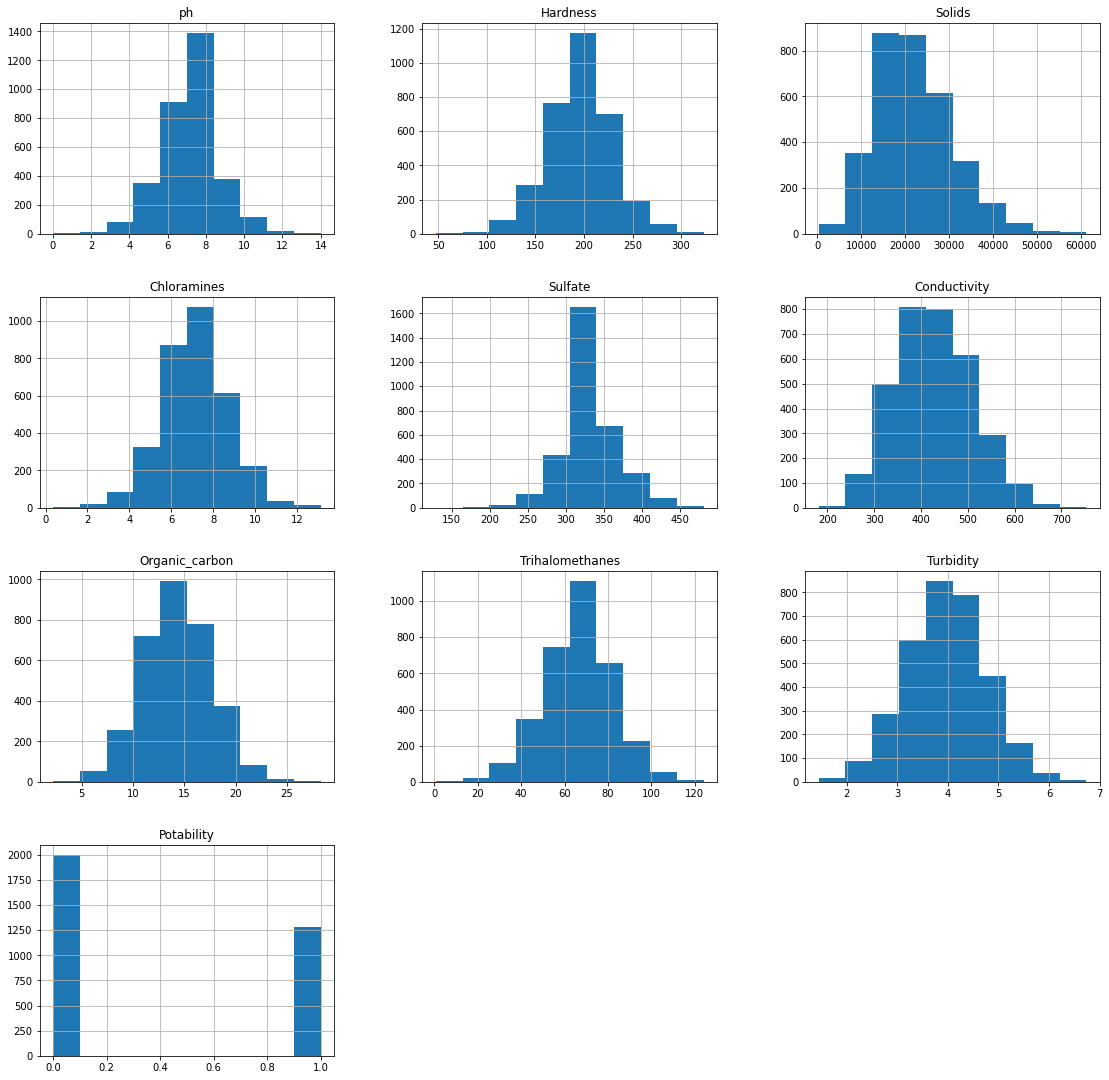

In [18]:
df.hist(figsize=(19,19))
plt.show()

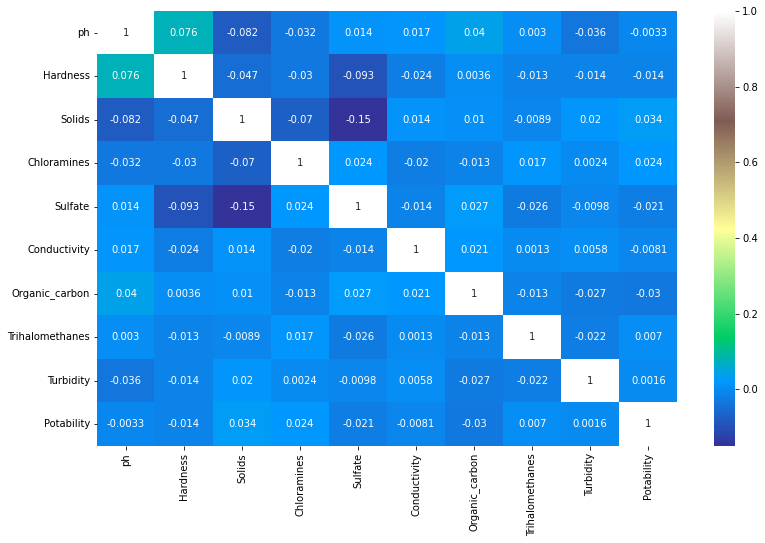

In [20]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

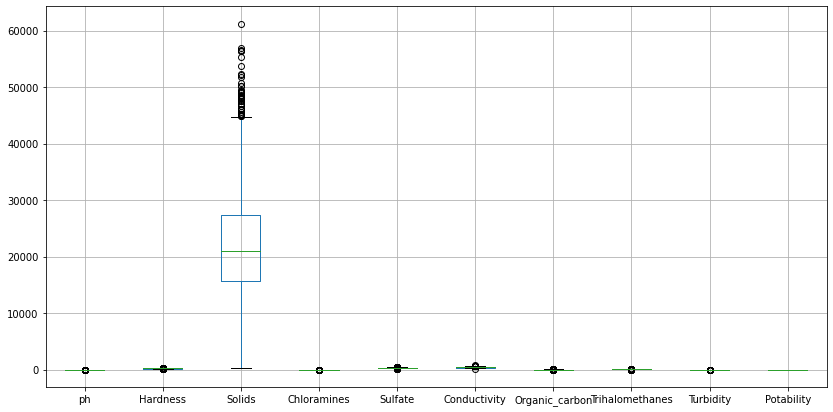

In [21]:
df.boxplot(figsize=(14,7))

In [22]:
X=df.drop('Potability',axis=1)
Y=df['Potability']


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100,shuffle=True)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=10,splitter='best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(y_test,prediction)*100}")
print(f"Confusion Matrix=\n {confusion_matrix(y_test,prediction)}")
print(f"Classification Report =\n {classification_report(y_test,prediction)}")

Accuracy Score = 59.14634146341463
Confusion Matrix=
 [[270 130]
 [138 118]]
Classification Report =
               precision    recall  f1-score   support

           0       0.66      0.68      0.67       400
           1       0.48      0.46      0.47       256

    accuracy                           0.59       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656



In [32]:
res = dt.predict([[5.735724,158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
res

0

In [40]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model= DecisionTreeClassifier
criterion =['gini','entropy']
splitter=['best','random']
min_samples_split=[2,4,6,8,10,12,14]

grid=dict(splitter=splitter,criterion=criterion, min_samples_split=min_samples_split)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search_dt=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,cv=cv,scoring='accuracy',error_score=0)



TypeError: ignored

AttributeError: ignored